## Regresión Polinómica 

Una vez que hemos visto la Regresión Lineal Simple y la Regresión Lineal Múltiple vamos a ver otro tipo de problema. Recordamos que la regresión lineal soluciona problemas que se pueden resolver con una recta o con un plano. En el caso de la simple (una sola variable de entrada y una de salida) será una recta y en el caso de la regresión lineal múltiple será un plano (una variable de salida pero muchas de entrada). Pero... ¿Qué pasa si no podemos predecir el resultado con datos de entrada nuevos en base a la fórmula de una recta (y=ax+b)? 

Por ejemplo, imagina que tenemos estos datos:

![Imagen1](imagen1.png)

Evidentemente no se puede resolver con una recta. Habría que usar una curva, es decir una ecuación polinómica:

![Imagen2](imagen2.png)

En este caso se ha usado un polinomio de grado 3. Vamos a ver como se resuelve este ejercicio.

El ejercicio de ejemplo tiene unos datos inventados para ilustrar el caso de una Regresión Polinómica. Vamos a generar los datos:

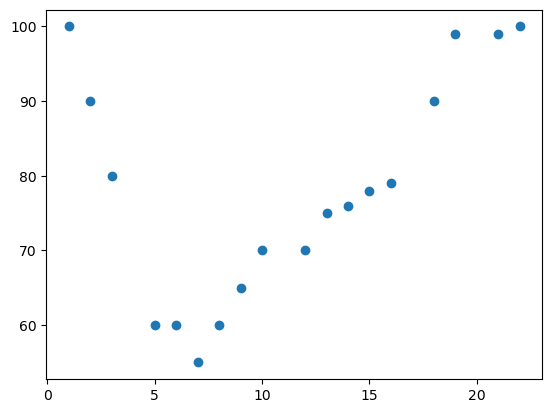

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show() 

y será nuestro dato resultado, lo que queremos predecir. ¿Qué pasa si lo intentamos solucionar con una recta? Vamos a verlo:

In [59]:
len(x)

18

In [60]:
#vamos a pasar la lista x a un numpy array para poder usar reshape que nos permite transformar un array 1D en uno 2D.
x = np.array(x)
x = x.reshape(-1,1) 
x.shape

(18, 1)

In [61]:


#Buscamos los parámetros de:
# y = a*x + b

#Dividimos el dataset en training y test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#Creamos y entrenamos el modelo de regresión lineal.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

#Calculamos con el modelo los resultados para el dataset de test.
y_pred = lm.predict(X_test)

#Calculamos el R cuadrado comparando el resultado calculado con el esperado.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.7337637600494751

Como podéis observar el resultado es negativo. Normalmente eso significa que hemos hecho algo mal o que el conjunto de datos predicho no se parece en nada al que debería ser porque el modelo no es adecuado. Éste segundo es nuestro caso. Veamos los datos originales frente a los que generaría nuestro modelo:

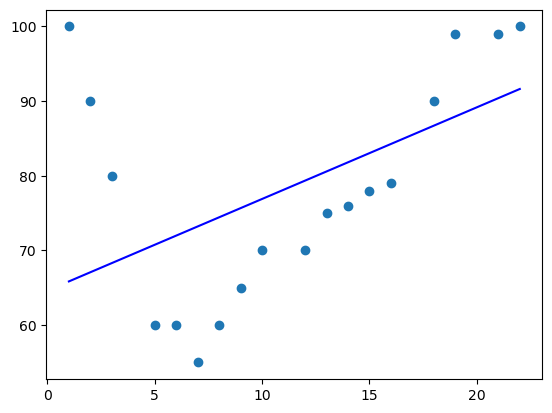

In [62]:
y_pred_total = lm.predict(x)
plt.scatter(x, y)
plt.plot(x,y_pred_total,color='blue')
plt.show() 

Se ve a simple vista que no podemos predecir los datos con una recta. Vamos a resolverlo con un polinomio de grado 2. Para ello lo que se hace es transformar los datos de entrada. Como lo que queremos es obtener una fórmula polinómica de grado 2 (y = ax²+bx+c) lo que se hace es meter como datos de entrada al modelo de regresión lineal tanto x como x². Veamos como se hace:

In [63]:
# y = a*x + b*z + c
# y = a*x + b*x^2 + c

# y = a*x^2 + b*x + c*z² + d*z + e

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 0)
print(X_poly)

[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]
 [ 12. 144.]
 [ 13. 169.]
 [ 14. 196.]
 [ 15. 225.]
 [ 16. 256.]
 [ 18. 324.]
 [ 19. 361.]
 [ 21. 441.]
 [ 22. 484.]]


Como puedes observar, nuestros datos de entrada ahora incluyen x y x². Ya podemos meter esto a un modelo de regresión lineal para que calcule los coeficientes y el término independiente:

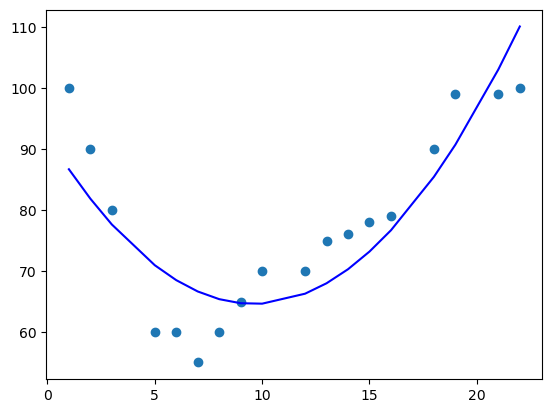

In [64]:
lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_total = lm.predict(X_poly)
plt.scatter(x, y)
plt.plot(x,y_pred_total,color='blue')
plt.show() 


In [65]:
y_pred = lm.predict(X_test)
#Calculamos el R cuadrado comparando el resultado calculado con el esperado.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6312470391338991

El resultado es algo mejor. Probemos con un grado 3:

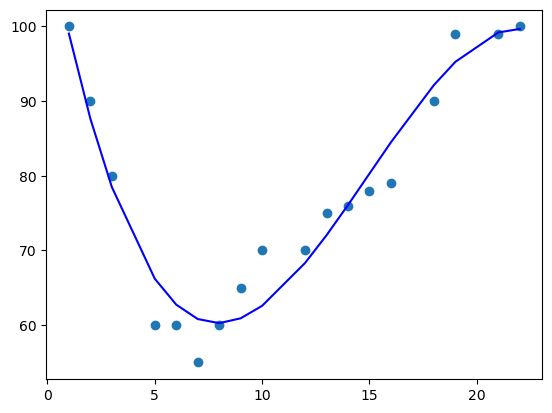

In [72]:
poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_poly = poly_features.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 2)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_total = lm.predict(X_poly)
plt.scatter(x, y)
plt.plot(x,y_pred_total,color='blue')
plt.show() 

In [73]:
y_pred = lm.predict(X_test)
#Calculamos el R cuadrado comparando el resultado calculado con el esperado.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9909229973357173

Mejor todavía... y si le metemos un grado 6 o mayor?

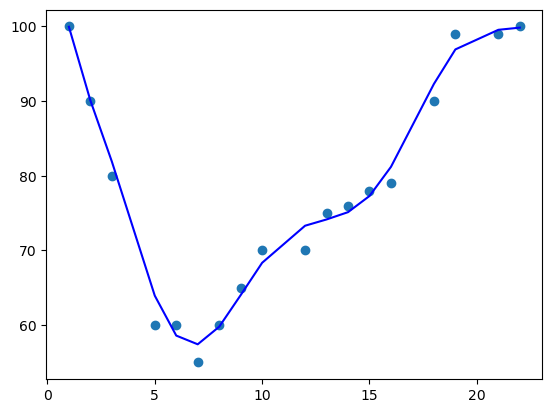

In [68]:
poly_features = PolynomialFeatures(degree=9,include_bias=False)
X_poly = poly_features.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 1)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred_total = lm.predict(X_poly)
plt.scatter(x, y)
plt.plot(x,y_pred_total,color='blue')
plt.show() 

Con este nuevo polinomio de grado 6 se observa ya overfitting.

In [69]:
from sklearn.metrics import r2_score
y_pred = lm.predict(X_test)
r2_score(y_test, y_pred)

0.9366076282602993

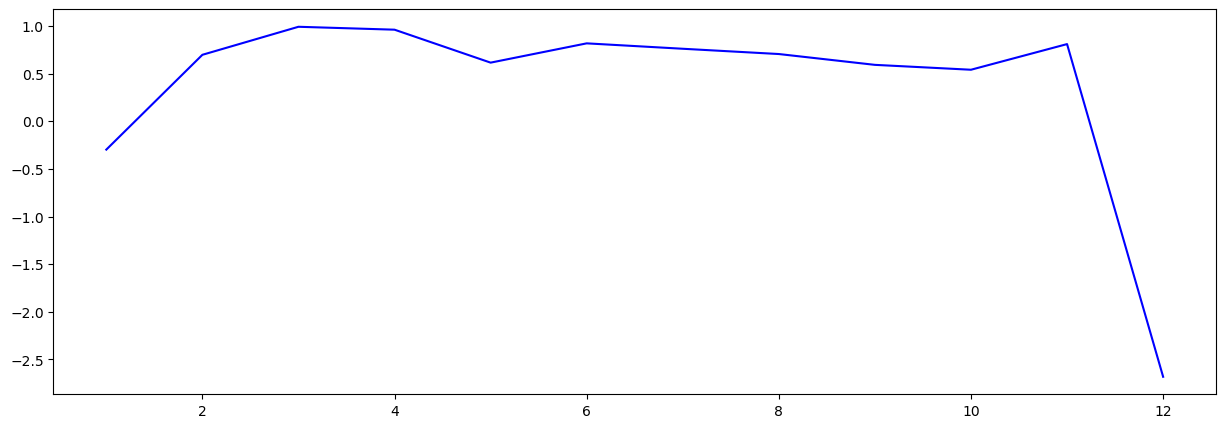

In [82]:
errores = []
grados = range(1,13)
#grados = [1,2,3,4]
for grado in grados:
    poly_features = PolynomialFeatures(degree=grado,include_bias=False)
    X_poly = poly_features.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 2)

    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    errores.append(r2_score(y_test, y_pred))
plt.figure(figsize=(15,5))
plt.plot(grados,errores,color='blue')

